# Initial Database EDA
----



### Lighthouse Labs, Midterm Project Project - Predicting Flight Delays.

##### January 13, 2023. Terre Leung, Tetiana Fesenko, and Jamie Dormaar

---


In [3]:
import pandas as pd
import numpy as np
from datetime import datetime as dt

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

import os
import json
import requests

In [4]:
# Load data tables:
flights_initial_500000_records    = pd.read_csv('../data/flights_initial_500000_records.csv', delimiter= ',')
flights_delay_dates_all_records   = pd.read_csv('../data/flights_delay_dates_all_records.csv', delimiter= ',')
flights_random_100000_records     = pd.read_csv('../data/flights_random_100000_records.csv', delimiter= ',')
flights_random_5000_records       = pd.read_csv('../data/flights_random_5000_records.csv', delimiter= ',')
flights_test_all_records          = pd.read_csv('../data/flights_test_all_records.csv', delimiter= ',')
fuel_consumption_all_records      = pd.read_csv('../data/fuel_consumption_all_records.csv', delimiter= ',')
passengers_initial_300000_records = pd.read_csv('../data/passengers_initial_300000_records.csv', delimiter= ',')
# flights_usa = pd.read_csv('../data/usa_flights2.csv', delimiter= ',')  # Terre is there a new csv to go with this one?

In [5]:
# Save working copies of the data:
df_fl_init    = flights_initial_500000_records.copy()
df_fl_delays  = flights_delay_dates_all_records.copy()
df_fl_smpl1   = flights_random_100000_records.copy()
df_fl_smpl2   = flights_random_5000_records.copy()
df_fl_test    = flights_test_all_records.copy()
df_fc         = fuel_consumption_all_records.copy()
df_pa_init    = passengers_initial_300000_records.copy()

##### Set your session working table to temp variable df:

In [29]:
df = df_fl_smpl1.copy()

##### SAVE a session timestamp to label the saved outputs: 
>(Optional: this can be useful if you want to help keep your files organized)


In [7]:

tag = 'EDA1_' # option with leading name            'Jamie_'
# tag = ''
# dt = dt.now().time().strftime(f'%b%d_%H%M')   # 'Jan01_1704'
# dt = dt.now().time().strftime(f'%b%-d_%H%M')  # 'Jan1_1708'
# dt = dt.now().time().strftime(f'%a_%H%M')        # 'Mon_1710'
dt = ''
session = f'{tag}{dt}'

##### SETUP: A first look at tables:


In [8]:

# flights_initial_500000_records
print(f'\nflights_initial_500000_records.shape: {flights_initial_500000_records.shape}')
display(flights_initial_500000_records.head(3))

# flights_delay_dates_all_records
print(f'\nflights_delay_dates_all_records.shape: {flights_delay_dates_all_records.shape}')
display(flights_delay_dates_all_records.head(3))

# flights_random_100000_records
print(f'\nflights_random_100000_records.shape: {flights_random_100000_records.shape}')
display(flights_random_100000_records.head(3))

# flights_test_all_records
print(f'\nflights_test_all_records.shape: {flights_test_all_records.shape}')
display(flights_test_all_records.head(3))

# fuel_consumption_all_records
print(f'\nfuel_consumption_all_records.shape: {fuel_consumption_all_records.shape}')
display(fuel_consumption_all_records.head(3))

# passengers_initial_300000_records
print(f'\npassengers_initial_300000_records.shape: {passengers_initial_300000_records.shape}')
display(passengers_initial_300000_records.head(3))



flights_initial_500000_records.shape: (500000, 41)


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime
0,2018-04-08,AA,AA,AA,2729,AA,N952NN,2729,11057,CLT,...,1,930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-04-08,AA,AA,AA,2730,AA,N908AA,2730,12889,LAS,...,1,236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-04-08,AA,AA,AA,2731,AA,N900UW,2731,11292,DEN,...,1,641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



flights_delay_dates_all_records.shape: (15927485, 2)


,fl_date,arr_delay
0,2019-09-07,-37.0
1,2019-09-07,-20.0
2,2019-09-07,40.0



flights_random_100000_records.shape: (100000, 42)


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-10-05,WN,WN,WN,179,WN,N8312C,179,12953,LGA,...,764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-10-05,WN,WN,WN,1106,WN,N219WN,1106,12953,LGA,...,725,10.0,0.0,3.0,0.0,28.0,NaN,NaN,NaN,NaN
2,2018-10-05,WN,WN,WN,1579,WN,N8535S,1579,13232,MDW,...,1750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



flights_test_all_records.shape: (660556, 20)


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance
0,2020-01-01 00:00:00,WN,WN,WN,5888,WN,N951WN,5888,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1810,1945,N,95,1,363
1,2020-01-01 00:00:00,WN,WN,WN,6276,WN,N467WN,6276,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1150,1320,N,90,1,363
2,2020-01-01 00:00:00,WN,WN,WN,4598,WN,N7885A,4598,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",2020,2130,N,70,1,333



fuel_consumption_all_records.shape: (3035, 25)


,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,1,NaN,NaN,0JQ,NaN,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,5100,0.0,5100,2016
1,1,21352.0,0WQ,0WQ,Avjet Corporation,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,396216,140239.0,536455,2016
2,1,21645.0,23Q,23Q,Songbird Airways Inc.,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,0.0,0,2016



passengers_initial_300000_records.shape: (300000, 37)


,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_city_name,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,month,year,distance_group,class
0,3,3,3600,18,0,210,41,81,166,160,...,"Olga Bay, AK",US,United States,0,40,4,10,2019,1,F
1,3,3,3000,15,3,24,0,39,67,61,...,"Old Harbor, AK",US,United States,0,79,3,10,2019,1,F
2,3,3,3600,18,1,0,0,93,167,161,...,"Kodiak Island, AK",US,United States,0,40,4,10,2019,1,F


##### NOTE: Missing Data content for each of the four data tables.


In [9]:
# Check for nulls:
# flights Table percent Null content:
df_fl_init_nulls = df_fl_init.isnull().sum().sort_values(ascending= False)
percent = (df_fl_init.isnull().sum()/df_fl_init.isnull().count()).sort_values(ascending = False)
df_fl_init_missing_data = pd.concat(
    [df_fl_init_nulls, percent]
  , axis=1
  , keys=['Total', 'Percent']
  , verify_integrity= True
)
print(f'\nflights_missing_data.head(20)')
display(df_fl_init_missing_data.head(20))

# flights_test Table percent Null content:
df_fl_test_nulls = df_fl_test.isnull().sum().sort_values(ascending= False)
percent = (df_fl_test.isnull().sum()/df_fl_test.isnull().count()).sort_values(ascending = False)
df_fl_test_missing_data = pd.concat(
    [df_fl_test_nulls, percent]
  , axis=1
  , keys=['Total', 'Percent']
  , verify_integrity= True
)
print(f'\nflights_test_missing_data.head(20)')
display(df_fl_test_missing_data.head(20))

# fuel_consumption Table percent Null content:
df_fc_nulls = df_fc.isnull().sum().sort_values(ascending= False)
percent = (df_fc.isnull().sum()/df_fc.isnull().count()).sort_values(ascending = False)
df_fc_missing_data = pd.concat(
    [df_fc_nulls, percent]
  , axis=1
  , keys=['Total', 'Percent']
  , verify_integrity= True
)
print(f'\nfuel_consumption_missing_data.head(20)')
display(df_fc_missing_data.head(20))

# passengers Table percent Null content:
df_pa_init_nulls = df_pa_init.isnull().sum().sort_values(ascending= False)
percent = (df_pa_init.isnull().sum()/df_pa_init.isnull().count()).sort_values(ascending = False)
df_pa_init_missing_data = pd.concat(
    [df_pa_init_nulls, percent]
  , axis=1
  , keys=['Total', 'Percent']
  , verify_integrity= True
)
print(f'\npassengers_missing_data.head(20)')
display(df_pa_init_missing_data.head(20))



flights_missing_data.head(20)


,Total,Percent
longest_add_gtime,497206,0.994412
total_add_gtime,497206,0.994412
first_dep_time,497206,0.994412
cancellation_code,494796,0.989592
late_aircraft_delay,418264,0.836528
security_delay,418264,0.836528
nas_delay,418264,0.836528
weather_delay,418264,0.836528
carrier_delay,418264,0.836528
air_time,6683,0.013366



flights_test_missing_data.head(20)


,Total,Percent
tail_num,1499,0.002269
fl_date,0,0.000000
dest_airport_id,0,0.000000
flights,0,0.000000
crs_elapsed_time,0,0.000000
dup,0,0.000000
crs_arr_time,0,0.000000
crs_dep_time,0,0.000000
dest_city_name,0,0.000000
dest,0,0.000000



fuel_consumption_missing_data.head(20)


,Total,Percent
total_gallons,6,0.001977
tdomt_gallons,3,0.000988
slat_gallons,2,0.000659
slat_cost,1,0.000329
spac_cost,1,0.000329
satl_cost,1,0.000329
tint_gallons,1,0.000329
airline_id,1,0.000329
ts_gallons,1,0.000329
sint_gallons,1,0.000329



passengers_missing_data.head(20)


,Total,Percent
departures_scheduled,0,0.0
origin_city_market_id,0,0.0
origin_city_name,0,0.0
origin_country,0,0.0
origin_country_name,0,0.0
dest_airport_id,0,0.0
dest_city_market_id,0,0.0
dest,0,0.0
dest_city_name,0,0.0
dest_country,0,0.0


##### NOTE: Differences between flights, and flights_test table data:

In [14]:
fl_test_exclusion = df_fl_init[df_fl_init.columns[~df_fl_init.columns.isin([flights_test_columns])]]
fl_test_exclusion.head(3)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime
0,2018-04-08,AA,AA,AA,2729,AA,N952NN,2729,11057,CLT,...,1,930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-04-08,AA,AA,AA,2730,AA,N908AA,2730,12889,LAS,...,1,236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-04-08,AA,AA,AA,2731,AA,N900UW,2731,11292,DEN,...,1,641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
flights_columns = list(df_fl_init.columns)
flights_test_columns = list(df_fl_test.columns)
fl_test_exclusion_columns = list(fl_test_exclusion.columns)
unique_columns = set(flights_columns + flights_test_columns)
unique_columns = list(shared_columns)

In [26]:
print(len(flights_columns))
print(len(flights_test_columns))
print(len(unique_columns))


81
20
41


In [30]:
print(df.shape)
df.dropna(subset= ['arr_delay'], inplace= True)
print(df.shape)

(100000, 42)
(98049, 42)


#### If we keep only the columns that are in the test table:


In [36]:
'branded_code_share',
'crs_arr_time',
'crs_dep_time',
'crs_elapsed_time',

'origin_airport_id',
'dest_airport_id',

'distance',
'fl_date',

'flights',
'mkt_carrier',
'mkt_carrier_fl_num',
'mkt_unique_carrier',
'op_carrier_fl_num',
'op_unique_carrier',
'tail_num'

SyntaxError: unmatched ']' (1836892476.py, line 22)

In [38]:
df[[
    'origin',
    'dest',
    'origin_airport_id',
    'dest_airport_id',
    'origin_city_name',
    'dest_city_name',
]].head()

,origin,dest,origin_airport_id,dest_airport_id,origin_city_name,dest_city_name
0,LGA,BNA,12953,10693,"New York, NY","Nashville, TN"
1,LGA,MDW,12953,13232,"New York, NY","Chicago, IL"
2,MDW,LAX,13232,12892,"Chicago, IL","Los Angeles, CA"
3,MKE,LAX,13342,12892,"Milwaukee, WI","Los Angeles, CA"
4,PDX,OAK,14057,13796,"Portland, OR","Oakland, CA"


- Airport code and ids are redundant, can drop one.  
- City names are only useful if we want to extract the state codes for the models:

In [39]:
df[[
    'flights',
    'mkt_carrier',
    'mkt_carrier_fl_num',
    'mkt_unique_carrier',
    'op_carrier_fl_num',
    'op_unique_carrier',
    'tail_num'
]].head()

,flights,mkt_carrier,mkt_carrier_fl_num,mkt_unique_carrier,op_carrier_fl_num,op_unique_carrier,tail_num
0,1,WN,179,WN,179,WN,N8312C
1,1,WN,1106,WN,1106,WN,N219WN
2,1,WN,1579,WN,1579,WN,N8535S
3,1,WN,2136,WN,2136,WN,N436WN
4,1,WN,2423,WN,2423,WN,N221WN


In [53]:
# Are the carrier codes ever different?
carrier = df[['mkt_carrier','mkt_unique_carrier','op_unique_carrier']].copy()
carrier['mkt_carrier'].nunique()

11

In [51]:
carrier.groupby(['mkt_carrier','mkt_unique_carrier'], as_index=False).count().sort_values('op_unique_carrier')

,mkt_carrier,mkt_unique_carrier,op_unique_carrier
9,VX,VX,119
6,HA,HA,1146
5,G4,G4,1208
4,F9,F9,1608
7,NK,NK,2398
2,B6,B6,3771
1,AS,AS,5224
10,WN,WN,16595
8,UA,UA,19065
3,DL,DL,21622


- mkt_carrier and mkt_unique_carrier appear to be duplicates. One can be dropped.
- maybe keep to encode and see if there are delay related trends?

In [55]:
# Is there ever more than one value under 'flights'?
df['flights'].nunique()

1

- 'flights' can be dropped, as it offers no unique info

In [56]:
# Do carrier flight numbers vary? and are they redundant with tail_num?
plane_nums = df[[
    'mkt_carrier_fl_num',
    'op_carrier_fl_num',
    'tail_num'
]].copy()
plane_nums.groupby(
    ['mkt_carrier_fl_num', 'op_carrier_fl_num']
    , as_index=False).count().sort_values('op_carrier_fl_num')

,mkt_carrier_fl_num,op_carrier_fl_num,tail_num
0,1,1,26
1,2,2,17
2,3,3,27
3,4,4,22
4,5,5,15
...,...,...,...
6698,9313,9313,1
6699,9314,9314,1
6700,9375,9375,1
6701,9387,9387,2


In [59]:
mkt_op_carrier_fl_num_diff = plane_nums[plane_nums['mkt_carrier_fl_num']!=plane_nums['op_carrier_fl_num']]
print(mkt_op_carrier_fl_num_diff.shape)
mkt_op_carrier_fl_num_diff

(12, 3)


,mkt_carrier_fl_num,op_carrier_fl_num,tail_num
20438,4452,5524,N417SW
20844,5811,7346,N824SK
21031,4656,3371,N175GJ
21032,3978,5586,N946SW
28277,3915,3370,N164GJ
36966,4766,3287,N750YX
50079,3962,3210,N12569
57205,3706,9178,N294PQ
69137,4421,3256,N14162
72542,4211,3225,N87318


12 rows of 100,000 not enough difference to care about.  
- Drop one permanently, and 
- shuffle other two to later if we have time for advanced Feature Engineering.

### Summary:

- 'branded_code_share',
- 'crs_arr_time',
- 'crs_dep_time',
- 'crs_elapsed_time',


- 'origin_airport_id',
- 'dest_airport_id',


- 'distance',
- 'fl_date',


##### drop for now:

Carrier codes:

- 'mkt_carrier', (&/or 'mkt_unique_carrier',)
- 'op_unique_carrier',

Flight mkt_carrier and tail nums:

- 'mkt_carrier_fl_num', (&/or 'op_carrier_fl_num',)
- 'tail_num'

- 'origin',
- 'dest',

Pos feature engineering later:

- 'origin_city_name',
- 'dest_city_name',

##### maybe forever:
- 'flights',

In [33]:
sorted(flights_columns)
sorted(flights_test_columns)

['branded_code_share',
 'crs_arr_time',
 'crs_dep_time',
 'crs_elapsed_time',
 'dest',
 'dest_airport_id',
 'dest_city_name',
 'distance',
 'dup',
 'fl_date',
 'flights',
 'mkt_carrier',
 'mkt_carrier_fl_num',
 'mkt_unique_carrier',
 'op_carrier_fl_num',
 'op_unique_carrier',
 'origin',
 'origin_airport_id',
 'origin_city_name',
 'tail_num']

In [34]:
sorted(flights_columns)
# sorted(flights_test_columns)

['actual_elapsed_time',
 'air_time',
 'arr_delay',
 'arr_time',
 'branded_code_share',
 'branded_code_share',
 'branded_code_share',
 'cancellation_code',
 'cancelled',
 'carrier_delay',
 'crs_arr_time',
 'crs_arr_time',
 'crs_arr_time',
 'crs_dep_time',
 'crs_dep_time',
 'crs_dep_time',
 'crs_elapsed_time',
 'crs_elapsed_time',
 'crs_elapsed_time',
 'dep_delay',
 'dep_time',
 'dest',
 'dest',
 'dest',
 'dest_airport_id',
 'dest_airport_id',
 'dest_airport_id',
 'dest_city_name',
 'dest_city_name',
 'dest_city_name',
 'distance',
 'distance',
 'distance',
 'diverted',
 'dup',
 'dup',
 'dup',
 'first_dep_time',
 'fl_date',
 'fl_date',
 'fl_date',
 'flights',
 'flights',
 'flights',
 'late_aircraft_delay',
 'longest_add_gtime',
 'mkt_carrier',
 'mkt_carrier',
 'mkt_carrier',
 'mkt_carrier_fl_num',
 'mkt_carrier_fl_num',
 'mkt_carrier_fl_num',
 'mkt_unique_carrier',
 'mkt_unique_carrier',
 'mkt_unique_carrier',
 'nas_delay',
 'op_carrier_fl_num',
 'op_carrier_fl_num',
 'op_carrier_fl_num'

In [35]:
sorted(fl_test_exclusion_columns)

['actual_elapsed_time',
 'air_time',
 'arr_delay',
 'arr_time',
 'branded_code_share',
 'cancellation_code',
 'cancelled',
 'carrier_delay',
 'crs_arr_time',
 'crs_dep_time',
 'crs_elapsed_time',
 'dep_delay',
 'dep_time',
 'dest',
 'dest_airport_id',
 'dest_city_name',
 'distance',
 'diverted',
 'dup',
 'first_dep_time',
 'fl_date',
 'flights',
 'late_aircraft_delay',
 'longest_add_gtime',
 'mkt_carrier',
 'mkt_carrier_fl_num',
 'mkt_unique_carrier',
 'nas_delay',
 'op_carrier_fl_num',
 'op_unique_carrier',
 'origin',
 'origin_airport_id',
 'origin_city_name',
 'security_delay',
 'tail_num',
 'taxi_in',
 'taxi_out',
 'total_add_gtime',
 'weather_delay',
 'wheels_off',
 'wheels_on']

##### ANALYZE: Arrival delay details in the flights table:


In [219]:
# Sample a subset:
x = df.sample(1000)
len(x)

1000

removing outliers as 1.5 * IQR:

In [224]:
# Instantiate the Arrival Delays:
delays = df['arr_delay']

# Define the quantiles of the delay distribution:
Q1 = delays.quantile(0.25)
Q3 = delays.quantile(0.75)
IQR = Q3 - Q1

# Define the outlier thresholds
min_threshold = (Q1 - 1.5 * IQR)
max_threshold = (Q3 + 1.5 * IQR)

df_clean = df[~((delays < min_threshold)|(delays > max_threshold))]
df_clean.shape

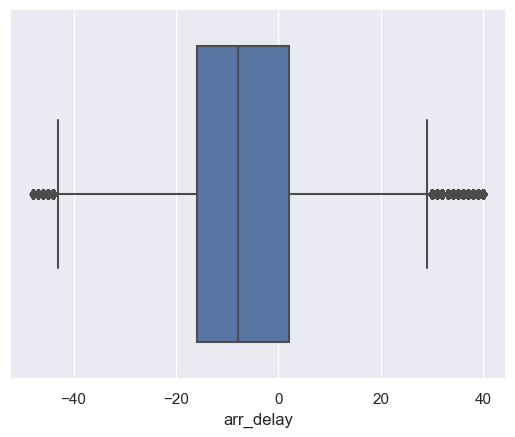

In [226]:
sns.boxplot(x=df_clean['arr_delay'])

#SAVE boxplot of clean delay distribution:
# plt.savefig(f'../Images/Arrival_delay_boxplot_{session}.png')

In [228]:
# Convert fl_date from string to datetime data type
df_clean[['fl_date']] = df_clean[['fl_date']].apply(pd.to_datetime)

df_clean['date'] = df_clean['fl_date'].dt.date
df_clean['year'] = df_clean['fl_date'].dt.year
df_clean['month'] = df_clean['fl_date'].dt.month